In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:

df = pd.read_csv("C:\\Users\\Shubham Trivedi\\OneDrive\\Desktop\\MySQL Layoffs Analysis\\layoffs_Cleaned.csv")



In [17]:
df.head(5)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Included Health,SF Bay Area,Healthcare,NaN,0.06,2022-07-25,Series E,United States,272.0
1,&Open,Dublin,Marketing,9.0,0.09,2022-11-17,Series A,Ireland,35.0
2,#Paid,Toronto,Marketing,19.0,0.17,2023-01-27,Series B,Canada,21.0
3,100 Thieves,Los Angeles,Consumer,12.0,NaN,2022-07-13,Series C,United States,120.0
4,10X Genomics,SF Bay Area,Healthcare,100.0,0.08,2022-08-04,Post-IPO,United States,242.0


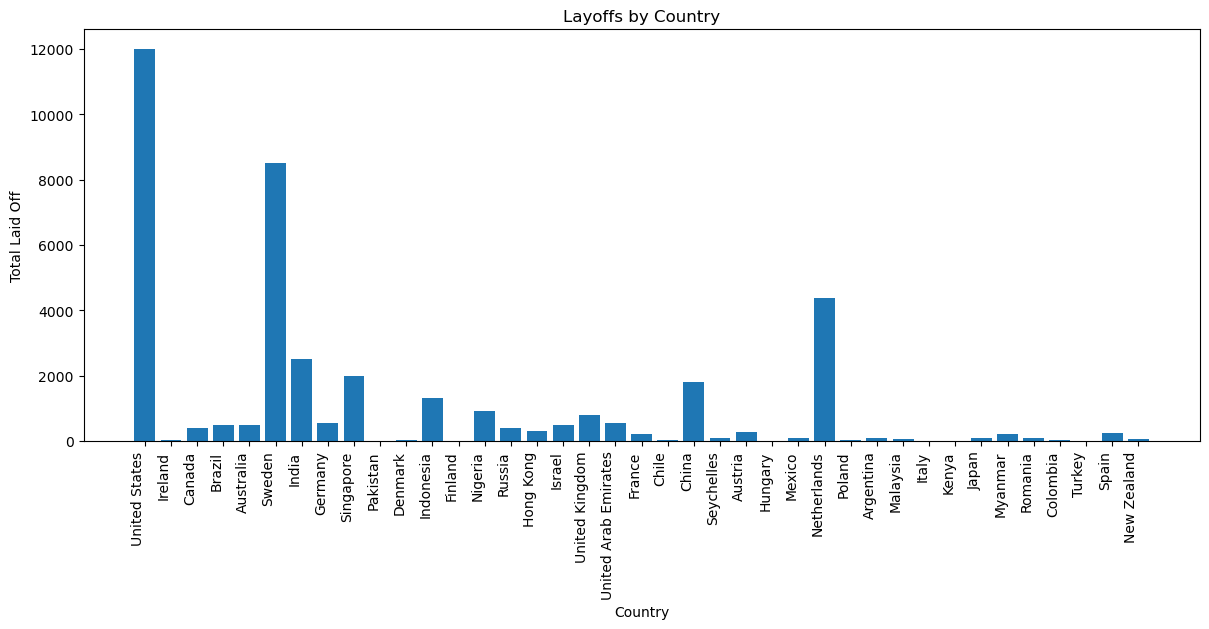

In [20]:
import matplotlib.pyplot as plt

x = df['country']
y = df['total_laid_off']

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(x, y)
plt.xticks(rotation=90, ha='right')  # Rotate and align labels
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.xlabel('Country')
plt.ylabel('Total Laid Off')
plt.title('Layoffs by Country')
plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                1000 non-null   object 
 1   location               1000 non-null   object 
 2   industry               999 non-null    object 
 3   total_laid_off         816 non-null    float64
 4   percentage_laid_off    788 non-null    float64
 5   date                   999 non-null    object 
 6   stage                  998 non-null    object 
 7   country                1000 non-null   object 
 8   funds_raised_millions  911 non-null    float64
dtypes: float64(3), object(6)
memory usage: 70.4+ KB


<Axes: >

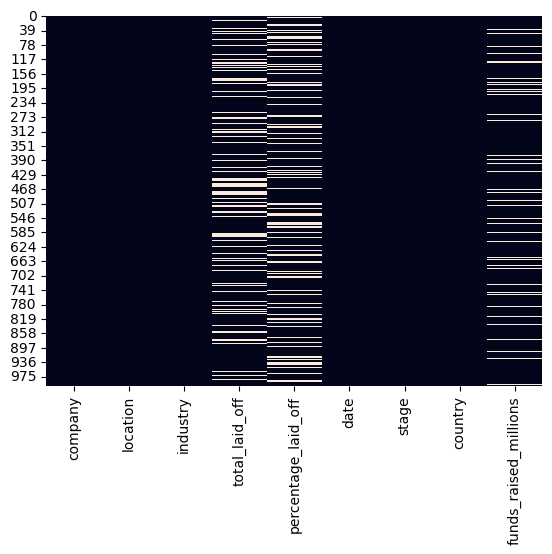

In [24]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False) 


In [25]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


In [26]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,year,month
0,Included Health,SF Bay Area,Healthcare,NaN,0.06,2022-07-25,Series E,United States,272.0,2022.0,7.0
1,&Open,Dublin,Marketing,9.0,0.09,2022-11-17,Series A,Ireland,35.0,2022.0,11.0
2,#Paid,Toronto,Marketing,19.0,0.17,2023-01-27,Series B,Canada,21.0,2023.0,1.0
3,100 Thieves,Los Angeles,Consumer,12.0,NaN,2022-07-13,Series C,United States,120.0,2022.0,7.0
4,10X Genomics,SF Bay Area,Healthcare,100.0,0.08,2022-08-04,Post-IPO,United States,242.0,2022.0,8.0


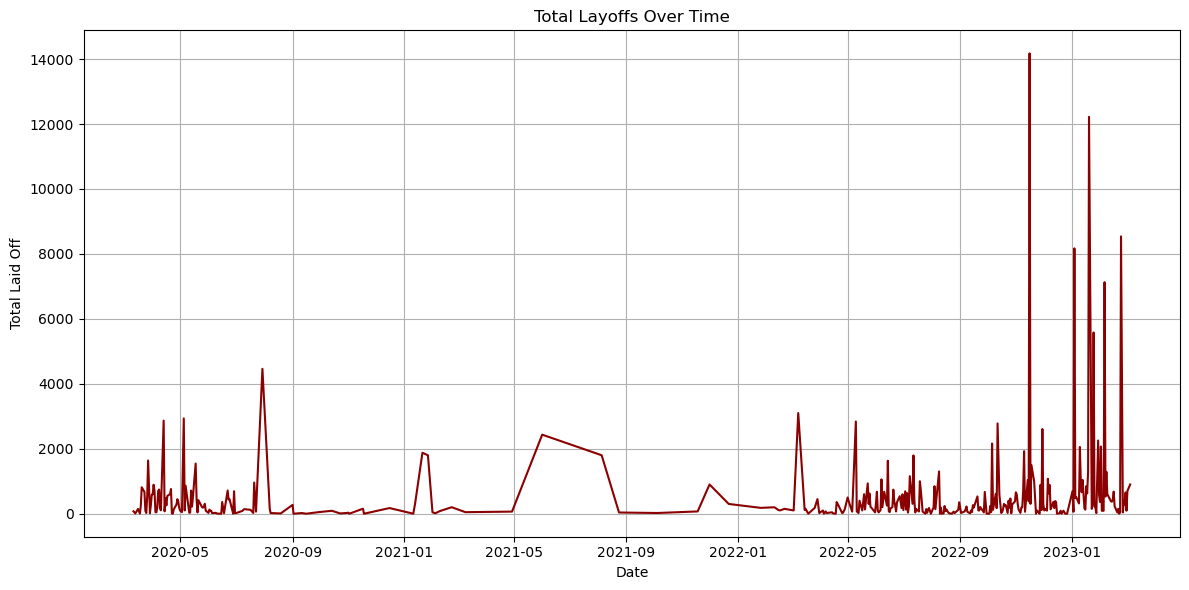

In [27]:
df_grouped = df.groupby('date')['total_laid_off'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['date'], df_grouped['total_laid_off'], color='darkred')
plt.title('Total Layoffs Over Time')
plt.xlabel('Date')
plt.ylabel('Total Laid Off')
plt.grid(True)
plt.tight_layout()
plt.show()

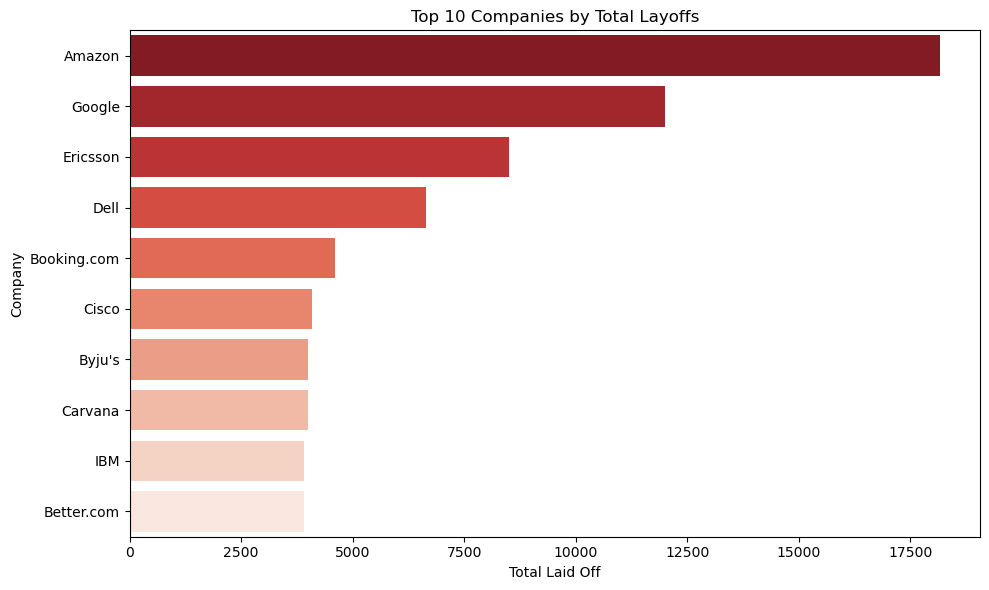

In [28]:

top_companies = df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Reds_r')
plt.title('Top 10 Companies by Total Layoffs')
plt.xlabel('Total Laid Off')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

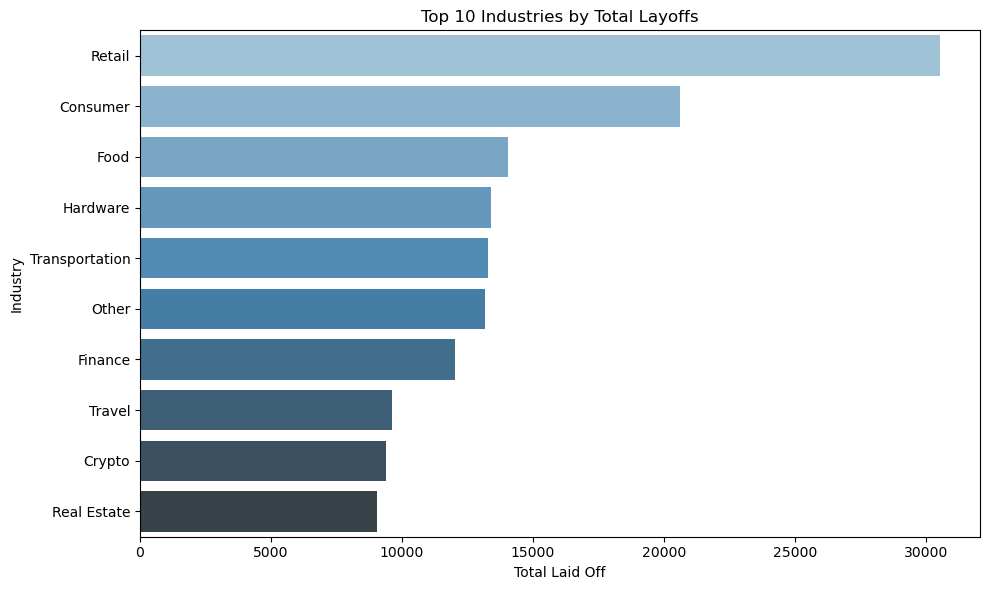

In [29]:
industry_layoffs = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=industry_layoffs.values, y=industry_layoffs.index, palette='Blues_d')
plt.title('Top 10 Industries by Total Layoffs')
plt.xlabel('Total Laid Off')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


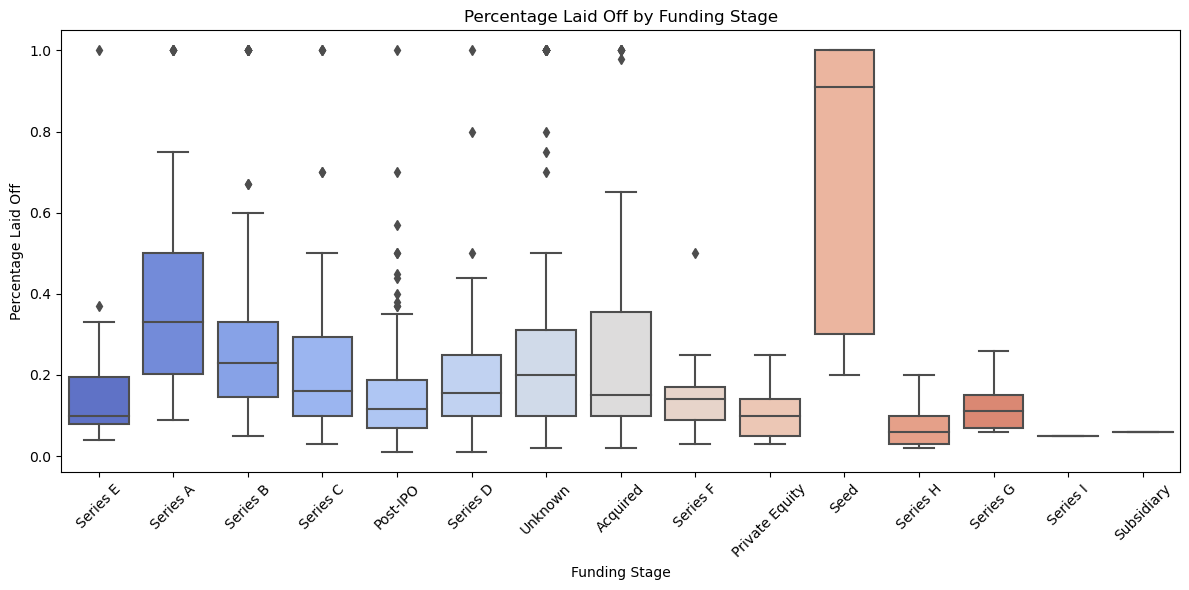

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='stage', y='percentage_laid_off', palette='coolwarm')
plt.title('Percentage Laid Off by Funding Stage')
plt.xlabel('Funding Stage')
plt.ylabel('Percentage Laid Off')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


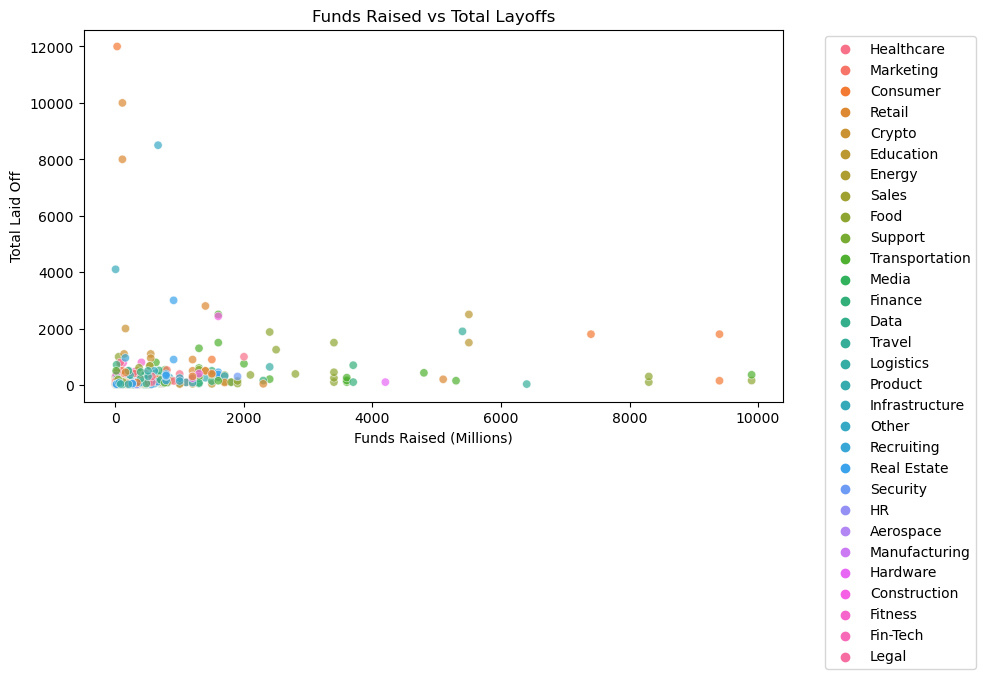

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='funds_raised_millions', y='total_laid_off', hue='industry', alpha=0.7)
plt.title('Funds Raised vs Total Layoffs')
plt.xlabel('Funds Raised (Millions)')
plt.ylabel('Total Laid Off')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
